# Processing combined segments

## Gathering basic datasets

We'll set ourselves up with a basic function to read and optionally save a dataframe

In [4]:
import geopandas as gpd
import pandas as pd

def read_open_dataframe(path, file_name=None):
    df = gpd.read_file(path)
    if file_name is not None:
        df.to_file(file_name, driver='GeoJSON')
    return df

We'll read in the street segments

In [2]:
streets = read_open_dataframe(
  'https://opendata.arcgis.com/datasets/ad5ed4193110452aac2d9485df3298e2_68.geojson'
)

We'll filter streets down to only those of certain types that make up segments that are lower class than a freeway and bigger than a minor residential.

In [3]:
street_segment_type_map = {
  '1110': 'Freeway',
  '1120': 'Ramps, Interchanges(one Freeway to another)',
  '1121':
    'On - Ramp or Slip Road Linkage(used to enter a Freeway or lower class road)',
  '1122':
    'Off - Ramp or Slip Road Linkage(used to exit a Freeway or lower class road)',
  '1123':
    'On / Off - Ramp or Slip Road Linkage(used to enter or exit a Freeway or lower class road)',
  '1200': 'Highway',
  '1221':
    'On - Ramp or Slip Road Linkage(used to enter a Highway or lower class road)',
  '1222':
    'Off - Ramp or Slip Road Linkage(used to exit a Highway or lower class road)',
  '1223':
    'On / Off - Ramp or Slip Road Linkage(used to enter or exit a Highway or lower class road)',
  '1300': 'Primary Arterial',
  '1321':
    'Primary Arterial Linkage(ramp/ slip road used to enter or exit a Primary Arterial or loser class road)',
  '1400': 'Arterial',
  '1421':
    'Arterial Linkage(ramp / slip road used to enter or exit an Arterial or lower class road)',
  '1450': 'Tertiary Street - Neighborhood Collector',
  '1471':
    'Tertiary Street Linkage(ramp / slip road used to enter a Tertiary Street or lower class road)',
  '1500': 'Minor Residential',
  '1521': 'Ramp / Slip Road used to enter or exit a Residential Street',
  '1550':
    "Minor Residential Street(Unclassified), named but without addresses(Clackamas Co.only, SUBAREA = 'C')",
  '1560':
    "Minor Residential Street(Unclassified), unnamed and without addresses(Clackamas Co.only, SUBAREA = 'C')",
  '1600': 'Alley',
  '1700': 'Private Named Road',
  '1780': 'Private Street, (planned)',
  '1800': 'Unnamed Private Road / Driveway',
  '1900': 'Pulic ROW EXISTS but no built roadway exists',
  '1950': 'Public planned street with addresses(will be active soon)',
  '1970': 'Virtual Segment; not a real roadway(accommodates address anomalies)',
  '1980':
    'Paper Street with addresses(accommodates address anomalies - in ROW unlike 1970)',
  '1990': 'Vacated Street',
  '2100': 'Railroad',
  '2200': 'Rapid Transit(MAX)',
  '3100': 'Non - Specific or Shared - Use Path',
  '3230': 'Steps(most have addresses)',
  '5101':
    'Freeway with Rapid Transit(MAX or streetcar).Auto traffic and rail trackage in shared ROW.',
  '5201':
    'Highway with Rapid Transit(MAX or streetcar).Auto traffic and rail trackage in shared ROW.',
  '5301':
    'Primary Arterial with Rapid Transit(MAX or streetcar).Auto traffic and rail trackage in shared ROW.',
  '5401':
    'Arterial with Rapid Transit(MAX or streetcar).Auto traffic and rail trackage in shared ROW.',
  '5402':
    'Secondary arterial with rapid transit, but no regular vehicle traffic.',
  '5450':
    'Tertiary Street with Railroad.Auto traffic and rail trackage in shared ROW.',
  '5451':
    'Tertiary Street with Rapid Transit(MAX or streetcar).Auto traffic and rail trackage in shared ROW.',
  '5500':
    'Minor Residential with Railroad.Auto traffic and rail trackage in shared ROW.',
  '5501':
    'Minor Residential with Rapid Transit(MAX or streetcar).Auto traffic and rail trackage in shared ROW.',
  '7700':
    'Short segments indicating mile post locations along certain highways to assist emergency dispatch in Clackamas and Washington Counties.These are short pseudo - segments that do not exist(Clackamas and Washington Counties only).',
  '8224': "Unknown Type(only in Yamhill County, SUBAREA = 'Y')",
  '9000': 'Forest Service Road'
};
streets = streets[streets['TYPE'] >= 1300]

In [4]:
street_segment_type_map = pd.DataFrame.from_dict(street_segment_type_map, orient='index', columns=['type'])
street_segment_type_map.index = street_segment_type_map.index.astype('int64')
street_segment_type_map.head()

,type
1110,Freeway
1120,"Ramps, Interchanges(one Freeway to another)"
1121,On - Ramp or Slip Road Linkage(used to enter a...
1122,Off - Ramp or Slip Road Linkage(used to exit a...
1123,On / Off - Ramp or Slip Road Linkage(used to e...


In [5]:
streets = streets.join(street_segment_type_map, on='TYPE')
streets.head()

,OBJECTID,LENGTH,LOCALID,ZERO,PREFIX,STREETNAME,FTYPE,DIRECTION,LEFTADD1,LEFTADD2,...,BTM_SEG_ID,PDX_F_NODE,PDX_T_NODE,UPD_DATE,CREATE_DAT,F_ZLEV,T_ZLEV,Shape_Length,geometry,type
0,1,90.357424,191050,0,NE,RUSSELL,ST,1,8601.0,8619.0,...,None,43608.0,100378.0,2014-09-29T20:07:13,1998-06-02T18:55:28,1.0,1.0,39.258000,LINESTRING (-122.5744155157821 45.540881364271...,Minor Residential
1,2,646.328583,191056,0,NE,13TH,AVE,1,10201.0,10499.0,...,None,31163.0,100381.0,2014-09-29T20:07:14,1998-06-03T20:53:51,1.0,1.0,282.019257,LINESTRING (-122.6519118009207 45.596829388794...,Minor Residential
2,3,84.764766,191053,0,NE,84TH,AVE,1,2701.0,2749.0,...,None,100380.0,43235.0,2014-09-29T20:07:15,1998-06-02T19:22:17,1.0,1.0,36.950324,LINESTRING (-122.576350409649 45.5415751003487...,Minor Residential
3,4,317.850680,191120,0,SE,89TH,AVE,1,7910.0,8078.0,...,None,100413.0,72841.0,2014-09-29T20:07:16,1998-07-20T17:30:29,1.0,1.0,138.371584,LINESTRING (-122.5719175992177 45.465833076113...,Minor Residential
4,5,260.533287,191146,0,NW,BROADWAY,,1,0.0,0.0,...,None,48689.0,100431.0,2014-09-29T20:07:18,1998-08-24T23:51:47,1.0,1.0,113.542776,LINESTRING (-122.6776090268029 45.527326932427...,Arterial


Then, we'll read in the bicycle network

In [6]:
# Can't save the bike network yet since some geometry is malformed
bike_network = read_open_dataframe(
    'https://opendata.arcgis.com/datasets/dbd6b5aa0ab14c859874eb41000e6a56_75.geojson'
)

We'll filter down the bike_network to only those that we are interested in: Active trails

In [7]:
bike_network = bike_network[bike_network['Status'] == 'Active']
bike_network = bike_network[bike_network['Facility'] == 'Off-Street Paths/Trails']
bike_network.plot()

We will trim these down to just the midpoint of the line geometry

In [8]:
streets.geometry = streets.geometry.interpolate(0.5, normalized=True)
bike_network.geometry = bike_network.interpolate(0.5, normalized=True)

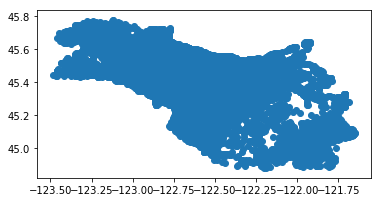

In [9]:
streets.plot()

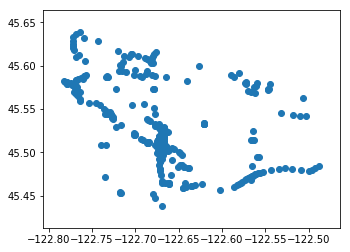

In [10]:
bike_network.plot()

Let's clean up the columns a bit...

In [11]:
streets = streets[['FULL_NAME', 'type', 'geometry']]
streets = streets.rename(index=str, columns={"FULL_NAME": "name"})
streets.head()

,name,type,geometry
0,NE RUSSELL ST,Minor Residential,POINT (-122.5742392047888 45.54088319203994)
1,NE 13TH AVE,Minor Residential,POINT (-122.6519754151176 45.59771457781652)
2,NE 84TH AVE,Minor Residential,POINT (-122.5763482173106 45.54169133058929)
3,SE 89TH AVE,Minor Residential,POINT (-122.5719134494502 45.46539719849665)
4,NW BROADWAY,Arterial,POINT (-122.6776160529759 45.52768417667291)


In [12]:
bike_network = bike_network[['SegmentName', 'Facility', 'geometry']]
bike_network = bike_network.rename(index=str, columns={"SegmentName": "name", 'Facility': 'type'})
bike_network.head()

,name,type,geometry
34,N LOMBARD ST,Off-Street Paths/Trails,POINT (-122.7717031461288 45.62852104326291)
35,N LOMBARD ST,Off-Street Paths/Trails,POINT (-122.7713854726491 45.62056059191839)
178,NW LEIF ERIKSON DR,Off-Street Paths/Trails,POINT (-122.7268688970905 45.54146992306962)
210,SW PEDESTRIAN TRL,Off-Street Paths/Trails,POINT (-122.68476598013 45.51194980927482)
218,SW LEWIS AND CLARK CIR,Off-Street Paths/Trails,POINT (-122.7007260908647 45.52117350218415)


In [13]:
len(bike_network)

333

We'll need pandas to do some operations now

In [14]:
import pandas as pd

In [15]:
frames = [streets, bike_network]
result = pd.concat(frames)

In [16]:
len(result)

103457

In [17]:
result['repr_x'] = result.geometry.map(lambda g: g.x)
result['repr_y'] = result.geometry.map(lambda g: g.y)

In [18]:
result = result.reset_index()
del result['index']
result

,name,type,geometry,repr_x,repr_y
0,NE RUSSELL ST,Minor Residential,POINT (-122.5742392047888 45.54088319203994),-122.574239,45.540883
1,NE 13TH AVE,Minor Residential,POINT (-122.6519754151176 45.59771457781652),-122.651975,45.597715
2,NE 84TH AVE,Minor Residential,POINT (-122.5763482173106 45.54169133058929),-122.576348,45.541691
3,SE 89TH AVE,Minor Residential,POINT (-122.5719134494502 45.46539719849665),-122.571913,45.465397
4,NW BROADWAY,Arterial,POINT (-122.6776160529759 45.52768417667291),-122.677616,45.527684
5,NE 116TH AVE,Minor Residential,POINT (-122.5432390077397 45.55574793993071),-122.543239,45.555748
6,SW 47TH AVE,Minor Residential,POINT (-122.7251333440837 45.46263821193544),-122.725133,45.462638
7,SE 115TH AVE,Minor Residential,POINT (-122.5444956331792 45.48934927650416),-122.544496,45.489349
8,SE 115TH AVE,Minor Residential,POINT (-122.5445137683318 45.48866609192351),-122.544514,45.488666
9,NE SKIDMORE ST,Minor Residential,POINT (-122.6081568918272 45.55391380286204),-122.608157,45.553914


In [19]:
result.to_file('../.data/combined_filtered_segment_midpoints.geojson', driver='GeoJSON')

In [33]:
result = gpd.read_file('../.data/combined_filtered_segment_midpoints.geojson')
voronoi = gpd.read_file('../.data/combined_filtered_segment_voronoi.geojson')

In [34]:
combined = gpd.sjoin(voronoi, result, how='inner', op='intersects')[['geometry', 'name', 'type','repr_x', 'repr_y']]
combined

,geometry,name,type,repr_x,repr_y
0,POLYGON ((-122.5748132076994 45.54110166950601...,NE RUSSELL ST,Minor Residential,-122.574239,45.540883
1,POLYGON ((-122.6503378612164 45.59861661774314...,NE 13TH AVE,Minor Residential,-122.651975,45.597715
2,POLYGON ((-122.5773157713236 45.54293976632954...,NE 84TH AVE,Minor Residential,-122.576348,45.541691
3,POLYGON ((-122.5727560154893 45.46582692286658...,SE 89TH AVE,Minor Residential,-122.571913,45.465397
4,POLYGON ((-122.6781024337198 45.52767332236773...,NW BROADWAY,Arterial,-122.677616,45.527684
5,POLYGON ((-122.5434937429028 45.55635981005248...,NE 116TH AVE,Minor Residential,-122.543239,45.555748
6,"POLYGON ((-122.7260246996756 45.4626595523721,...",SW 47TH AVE,Minor Residential,-122.725133,45.462638
7,POLYGON ((-122.5445743025644 45.48995151253624...,SE 115TH AVE,Minor Residential,-122.544496,45.489349
8,"POLYGON ((-122.544687577744 45.48901253934905,...",SE 115TH AVE,Minor Residential,-122.544514,45.488666
9,"POLYGON ((-122.6082114787643 45.554632712911, ...",NE SKIDMORE ST,Minor Residential,-122.608157,45.553914


In [35]:
combined.to_file('../.data/segment_cells.geojson', driver='GeoJSON')

In [45]:
from shapely.wkt import dumps
combined['wkt'] = combined.geometry.map(lambda x: dumps(x))
combined.head()

,geometry,name,type,repr_x,repr_y,wkb,wkt
0,POLYGON ((-122.5748132076994 45.54110166950601...,NE RUSSELL ST,Minor Residential,-122.574239,45.540883,b'\x01\x03\x00\x00\x00\x01\x00\x00\x00\x08\x00...,POLYGON ((-122.5748132076993784 45.54110166950...
1,POLYGON ((-122.6503378612164 45.59861661774314...,NE 13TH AVE,Minor Residential,-122.651975,45.597715,b'\x01\x03\x00\x00\x00\x01\x00\x00\x00\x07\x00...,POLYGON ((-122.6503378612163999 45.59861661774...
2,POLYGON ((-122.5773157713236 45.54293976632954...,NE 84TH AVE,Minor Residential,-122.576348,45.541691,"b""\x01\x03\x00\x00\x00\x01\x00\x00\x00\x08\x00...",POLYGON ((-122.5773157713235832 45.54293976632...
3,POLYGON ((-122.5727560154893 45.46582692286658...,SE 89TH AVE,Minor Residential,-122.571913,45.465397,b'\x01\x03\x00\x00\x00\x01\x00\x00\x00\x05\x00...,POLYGON ((-122.5727560154893041 45.46582692286...
4,POLYGON ((-122.6781024337198 45.52767332236773...,NW BROADWAY,Arterial,-122.677616,45.527684,b'\x01\x03\x00\x00\x00\x01\x00\x00\x00\x06\x00...,POLYGON ((-122.6781024337197721 45.52767332236...


In [37]:
import sqlalchemy
from sqlalchemy.orm.session import sessionmaker
connection = {
    'login': 'pudlsqladmin',
    'password': 'Rj5i8YRUi5Rg',
    'host': 'pudlsql1.database.windows.net',
    'port': 1433,
    'database': 'mobilitydw'
}
connection_string = f"mssql+pyodbc://{connection['login']}@{connection['host']}:{connection['password']}@{connection['host']}:{connection['port']}/{connection['database']}?driver=ODBC+Driver+17+for+SQL+Server"
engine = sqlalchemy.engine.create_engine(connection_string, isolation_level='AUTOCOMMIT')


In [38]:
combined[['wkb', 'name', 'type','repr_x', 'repr_y']].to_sql(name='segment',
                         con=engine,
                         schema='dim',
                         if_exists='append',
                         index=True,
                         index_label='key',
                         chunksize=10)

OperationalError: (pyodbc.OperationalError) ('08S01', '[08S01] [Microsoft][ODBC Driver 17 for SQL Server]Communication link failure (0) (SQLExecDirectW)')
[SQL: INSERT INTO dim.segment ([key], wkb, name, type, repr_x, repr_y) VALUES (?, ?, ?, ?, ?, ?)]
[parameters: ((12300, b'\x01\x03\x00\x00\x00\x01\x00\x00\x00\t\x00\x00\x00\x03\xa4\x93\xf1\xd9\xa8^\xc0\x06D\x96\x82\xce\xbfF@\xeb?\xabs\xe4\xa8^\xc0I,\xb8U\xce\xbfF@\x10\x ... (189 characters truncated) ... 94\xd9\xd9\xa8^\xc0\x08\x11\xfa\x9f\xa5\xbfF@\x9e\xef\xdb\x9e\xd4\xa8^\xc0\x9fE\xad\xe9\xbb\xbfF@\x03\xa4\x93\xf1\xd9\xa8^\xc0\x06D\x96\x82\xce\xbfF@', 'SE POWELL BLVD', 'Primary Arterial', -122.6386182456821, 45.49787020228261), (12301, b"\x01\x03\x00\x00\x00\x01\x00\x00\x00\x07\x00\x00\x00.\x87A\xb1;\xa7^\xc0\xd8\xe76\xb9\xdc\xbfF@r\xa4\xf3\xa6=\xa7^\xc0;\xdc'{\xd1\xbfF@\xe9\xd9\xc5\ ... (66 characters truncated) ... e\xc8\x05\xc6\xbfF@\xec\xa0\xe9\x02.\xa7^\xc0\x94\r\xf6s\xd1\xbfF@\x90e\x8d(1\xa7^\xc0\xa0> \xaf\xdc\xbfF@.\x87A\xb1;\xa7^\xc0\xd8\xe76\xb9\xdc\xbfF@", 'SE 49TH AVE', 'Minor Residential', -122.61258462228562, 45.49857973729068), (12302, b'\x01\x03\x00\x00\x00\x01\x00\x00\x00\x07\x00\x00\x00\x87"\xccAO\xa7^\xc0\xcc!\x8f&\xce\xbfF@\xf2\xe2a\xe8K\xa7^\xc0\xe8]\xd4\x1a\xbb\xbfF@7\xd4\xdf\ ... (48 characters truncated) ... xa7^\xc0\xd3\xd5r\x10\xc6\xbfF@r\xa4\xf3\xa6=\xa7^\xc0;\xdc\'{\xd1\xbfF@TY#\xd6M\xa7^\xc0!i\xa6\x87\xd1\xbfF@\x87"\xccAO\xa7^\xc0\xcc!\x8f&\xce\xbfF@', 'SE HAIG ST', 'Minor Residential', -122.61357276146245, 45.498238143095094), (12303, b"\x01\x03\x00\x00\x00\x01\x00\x00\x00\x07\x00\x00\x00\x03\xe7V\xf4\xc7\xa9^\xc07V\xc2J\xbb\xbfF@\xa0H\xc4\xe8\xc4\xa9^\xc0IT\xe4\x1b\xae\xbfF@>\xa6\x ... (71 characters truncated) ... \x91\xb9\xbfF@C\xe5\x14\xd9\xbd\xa9^\xc0<\xef\xe5?\xc5\xbfF@o'\xe5\xc7\xc5\xa9^\xc0\xa2w\x03\x7f\xc5\xbfF@\x03\xe7V\xf4\xc7\xa9^\xc07V\xc2J\xbb\xbfF@", 'SE 13TH AVE', 'Minor Residential', -122.65234626302308, 45.49785288236771), (12304, b'\x01\x03\x00\x00\x00\x01\x00\x00\x00\x07\x00\x00\x00;\xe7\xc6\x04\xd4\xa9^\xc0\x81u\x05\xa5\xb0\xbfF@\xe2NA\xeb\xcf\xa9^\xc0\x15\x0f\x02]\xa1\xbfF@\ ... (74 characters truncated) ... \x1b\xae\xbfF@\x03\xe7V\xf4\xc7\xa9^\xc07V\xc2J\xbb\xbfF@\x17b\x86u\xd2\xa9^\xc0-\x93\x93v\xb8\xbfF@;\xe7\xc6\x04\xd4\xa9^\xc0\x81u\x05\xa5\xb0\xbfF@', 'SE RHINE ST', 'Minor Residential', -122.65310401981301, 45.497502810124956), (12305, b'\x01\x03\x00\x00\x00\x01\x00\x00\x00\x08\x00\x00\x00\x85\xf5\x83<\x96\xa5^\xc0\x08\x07\xe4>\xfc\xbfF@\xa9l\xd3\x98\x9e\xa5^\xc052\xcdU\xeb\xbfF@6]\x ... (135 characters truncated) ... xbfF@\x8f\x08\xe5\x06\x89\xa5^\xc0\xd0\xed\xd9-\xed\xbfF@CR\x94(\x91\xa5^\xc0\xac\xbf\xc4/\xfc\xbfF@\x85\xf5\x83<\x96\xa5^\xc0\x08\x07\xe4>\xfc\xbfF@', 'SE 74TH AVE', 'Minor Residential', -122.5871188441923, 45.49937072972145), (12306, b'\x01\x03\x00\x00\x00\x01\x00\x00\x00\x08\x00\x00\x00\xebN$\x05\x9f\xa5^\xc0\x07Q\xe0W\xeb\xbfF@,+\x03I\xaa\xa5^\xc0\xa4\xd3\xce\x8e\xd4\xbfF@\x1c\x9 ... (112 characters truncated) ... v\x08\n\xc0\xbfF@6]\xcd(\x94\xa5^\xc0\x1d\x92\xe3\xe6\xd5\xbfF@\xa9l\xd3\x98\x9e\xa5^\xc052\xcdU\xeb\xbfF@\xebN$\x05\x9f\xa5^\xc0\x07Q\xe0W\xeb\xbfF@', 'SE FRANKLIN ST', 'Minor Residential', -122.58782445961904, 45.49868348811677), (12307, b"\x01\x03\x00\x00\x00\x01\x00\x00\x00\x07\x00\x00\x00\xec\xa0\xe9\x02.\xa7^\xc0\x94\r\xf6s\xd1\xbfF@\x06\xbf\x8c<1\xa7^\xc0\xce\x0e\xc8\x05\xc6\xbfF@ ... (58 characters truncated) ... ^\xc0*>X]\xba\xbfF@\xb2\x89\x13\xf3#\xa7^\xc0y;\xf7\xe3\xc5\xbfF@l\xf1,.'\xa7^\xc0\xa9=\xb1k\xd1\xbfF@\xec\xa0\xe9\x02.\xa7^\xc0\x94\r\xf6s\xd1\xbfF@", 'SE HAIG ST', 'Minor Residential', -122.6119756566003, 45.49823608820877), (12308, b'\x01\x03\x00\x00\x00\x01\x00\x00\x00\x07\x00\x00\x00T\xc8\x8eo\xb1\xa9^\xc0\xbbL \x1d\xc5\xbfF@\xf6\x9b\xf2\xa2\xb5\xa9^\xc0\x19\xff\x1cp\xb9\xbfF@\ ... (86 characters truncated) ... ad\xbfF@\x13;\xad8\xa9\xa9^\xc0\xfe\xc8\xc1I\xb9\xbfF@\x04\xa5\x8c=\xad\xa9^\xc0\xfe\xd3\xb8\xfb\xc4\xbfF@T\xc8\x8eo\xb1\xa9^\xc0\xbbL \x1d\xc5\xbfF@', 'SE 14TH AVE', 'Minor Residential', -122.65133233321443, 45.49784433250817), (12309, b'\x01\x03\x00\x00\x00\x01\x00\x00\x00\x07\x00\x00\x00N\xdeg\xd5\xb9\xa9^\xc0Er\x83\x91\xb9\xbfF@>\xa6\x8c\x08\xbe\xa9^\xc0\xda\xba0\xe5\xad\xbfF@\x80 ... (92 characters truncated) ... F@\xaf\x87K\x9e\xb1\xa9^\xc0\xf4\xbb\xde\xbe\xad\xbfF@\xf6\x9b\xf2\xa2\xb5\xa9^\xc0\x19\xff\x1cp\xb9\xbfF@N\xdeg\xd5\xb9\xa9^\xc0Er\x83\x91\xb9\xbfF@', 'SE RHINE ST', 'Minor Residential', -122.65184483960115, 45.49749207716207))]
(Background on this error at: http://sqlalche.me/e/e3q8)

In [46]:
combined['wkt'].str.len().describe()

count    99510.000000
mean       310.980123
std         56.495116
min        182.000000
25%        268.000000
50%        311.000000
75%        354.000000
max       1085.000000
Name: wkt, dtype: float64

In [50]:
combined = combined.round(10)

In [51]:
combined[['name', 'type','repr_x', 'repr_y', 'wkt']].to_csv(
    '../.data/segment_cells.csv',
    index=True,
    index_label='key'
)

In [52]:
combined['wkt'].str.len().describe()

count    99510.000000
mean       310.980123
std         56.495116
min        182.000000
25%        268.000000
50%        311.000000
75%        354.000000
max       1085.000000
Name: wkt, dtype: float64

In [43]:
combined.isnull().any(axis=0)

geometry    False
name         True
type        False
repr_x      False
repr_y      False
wkb         False
dtype: bool